In [57]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(0)

# load data
mnist = input_data.read_data_sets('input/data', one_hot=True)

Extracting input/data\train-images-idx3-ubyte.gz
Extracting input/data\train-labels-idx1-ubyte.gz
Extracting input/data\t10k-images-idx3-ubyte.gz
Extracting input/data\t10k-labels-idx1-ubyte.gz


In [58]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

y = 9 (Ankle boot)


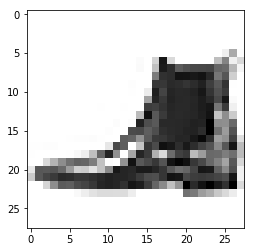

In [59]:
import numpy as np
sample_label_1 = np.where(mnist.train.labels[5] == 1)[0][0]
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow( mnist.train.images[5].reshape(28,28), cmap='Greys')
plt.show()

In [60]:
XX = tf.placeholder(tf.float32, [None, 28, 28, 1])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
x = tf.reshape(x, [-1, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

#y = tf.nn.softmax(tf.matmul(x, W) + b)
y = tf.matmul(x, W) + b

## GradinetDescent

In [61]:
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## AdamOptimizer

In [62]:
cross_entropy2 = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step2 = tf.train.AdamOptimizer(0.005).minimize(cross_entropy2)

## GradinetDescent Training

In [63]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

## Validation

In [64]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run([cross_entropy,accuracy], feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

[0.74852586, 0.81370002]


## AdamOptimizer Training

In [65]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step2, feed_dict={x: batch_xs, y_: batch_ys})

## Validation

In [66]:
correct_prediction2 = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy2 = tf.reduce_mean(tf.cast(correct_prediction2, tf.float32))
print(sess.run([cross_entropy2,accuracy2], feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

[0.48358941, 0.83579999]


In [67]:
def training_step(i, update_test_data, update_train_data):

    #print ("\r", i),
    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step2, feed_dict={x: batch_X, y_: batch_Y})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy2, cross_entropy2], feed_dict={x: batch_X, y_: batch_Y})
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy2, cross_entropy2], feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        test_a.append(a)
        test_c.append(c)

    
    return (train_a, train_c, test_a, test_c)



In [68]:
# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    (a, c, ta, tc) = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc

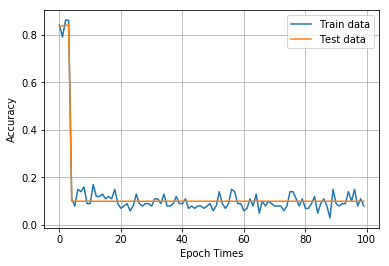

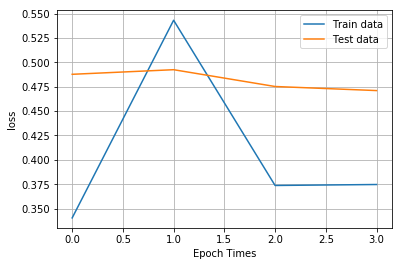

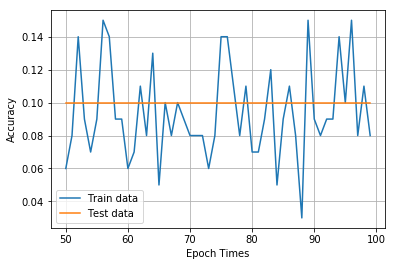

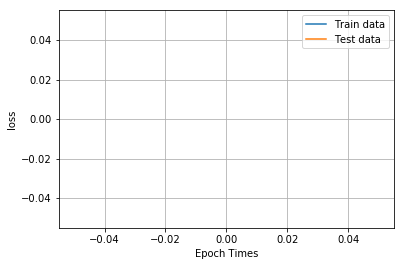

In [69]:
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a, label='Train data')
plt.plot(test_a, label='Test data')
plt.xlabel('Epoch Times')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# loss training vs testing dataset
plt.plot(train_c,label='Train data')
plt.plot(test_c,label='Test data')
plt.xlabel('Epoch Times')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,100)
plt.plot(x_range, train_a[zoom_point:],label='Train data')
plt.plot(x_range, test_a[zoom_point:],label='Test data')
plt.xlabel('Epoch Times')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(train_c[zoom_point:],label='Train data')
plt.plot(test_c[zoom_point:],label='Test data')
plt.xlabel('Epoch Times')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

In [70]:
print(test_a)

[0.8369, 0.83609998, 0.83670002, 0.84200001, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
